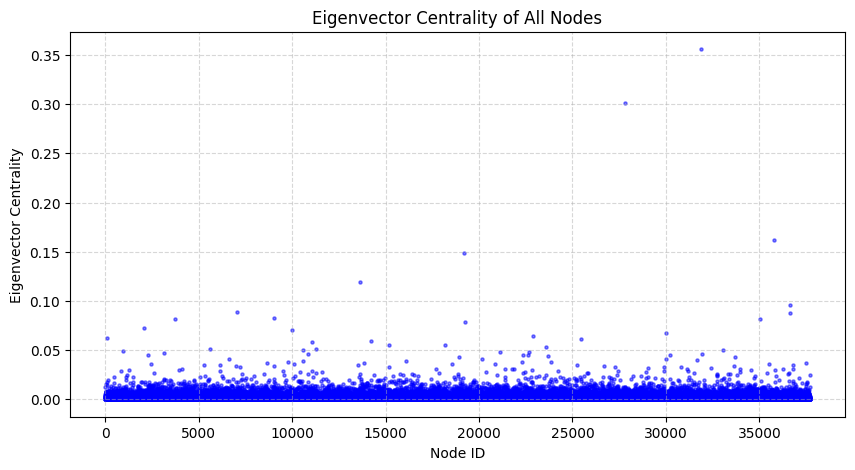

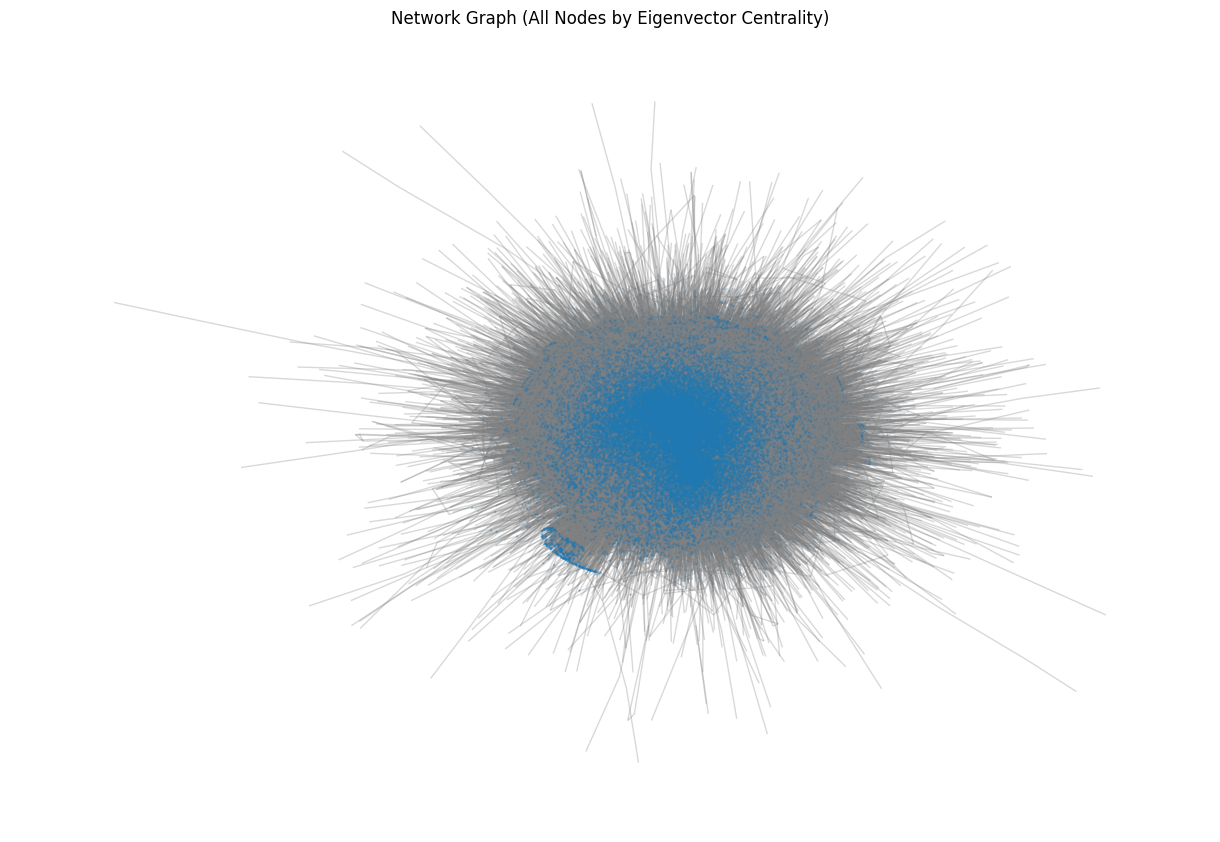

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load datasets
edges_df = pd.read_csv(r"musae_git_edges.csv")
target_df = pd.read_csv(r"musae_git_target.csv")

# Create graph from edge list
G = nx.from_pandas_edgelist(edges_df, source='id_1', target='id_2')

# Compute Eigenvector Centrality for all nodes
eigenvector_centrality = nx.eigenvector_centrality_numpy(G)

# Convert to DataFrame
eigenvector_centrality_df = pd.DataFrame(list(eigenvector_centrality.items()), columns=['Node', 'Eigenvector Centrality'])

# Merge with target dataset
eigenvector_centrality_df = eigenvector_centrality_df.merge(target_df, left_on='Node', right_on='id', how='left').drop(columns=['id'])

# Save results
eigenvector_centrality_df.to_csv("eigenvector_centrality_results.csv", index=False)

### 1. Scatter Plot (Eigenvector Centrality for All Nodes)**
plt.figure(figsize=(10, 5))
plt.scatter(eigenvector_centrality_df["Node"], eigenvector_centrality_df["Eigenvector Centrality"], 
            color='blue', alpha=0.5, s=5)

plt.xlabel("Node ID")
plt.ylabel("Eigenvector Centrality")
plt.title("Eigenvector Centrality of All Nodes")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

### 2. Network Graph (All Nodes, Optimized)**
plt.figure(figsize=(12, 8))

# Node sizes based on Eigenvector Centrality (scaled for visibility)
node_sizes = [eigenvector_centrality[node] * 300 for node in G.nodes()]

# Draw the full network graph (Spring layout for better readability)
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, node_size=node_sizes, with_labels=False, edge_color="gray", alpha=0.3)

plt.title("Network Graph (All Nodes by Eigenvector Centrality)")
plt.show()


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Load datasets
edges_df = pd.read_csv("musae_git_edges.csv")
target_df = pd.read_csv("musae_git_target.csv")

# Create a graph from edges
G = nx.from_pandas_edgelist(edges_df, source='id_1', target='id_2')

# Select 15,000 random nodes for a larger subgraph
sample_nodes = random.sample(list(G.nodes()), min(15000, len(G.nodes())))
subgraph = G.subgraph(sample_nodes)

# Compute Betweenness Centrality (Approximate for efficiency)
betweenness_centrality = nx.betweenness_centrality(subgraph, normalized=True, endpoints=True)

# Compute Closeness Centrality
closeness_centrality = nx.closeness_centrality(subgraph)

# Compute Transitivity (Global Clustering Coefficient)
transitivity = nx.transitivity(G)

# Convert results to DataFrame
centrality_df = pd.DataFrame({
    'Node': list(subgraph.nodes()),
    'Betweenness Centrality': [betweenness_centrality[node] for node in subgraph.nodes()],
    'Closeness Centrality': [closeness_centrality[node] for node in subgraph.nodes()]
})

# Save results
centrality_df.to_csv("centrality_metrics_15000_nodes.csv", index=False)

# Print global metrics
print("Transitivity:", transitivity)

# Scatter Plot (Betweenness vs Closeness Centrality)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=centrality_df["Betweenness Centrality"], 
                y=centrality_df["Closeness Centrality"], 
                color='red', alpha=0.5)
plt.xlabel("Betweenness Centrality")
plt.ylabel("Closeness Centrality")
plt.title("Betweenness vs Closeness Centrality")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# Network Graph (Optimized for 15,000 Nodes, Better Visibility)
plt.figure(figsize=(14, 10))

# Node sizes based on Betweenness Centrality (scaled for visibility)
node_sizes = [betweenness_centrality[node] * 3000 for node in subgraph.nodes()]

# Generate optimized force-directed layout
pos = nx.spring_layout(subgraph, seed=42, k=0.05, iterations=30)

# Draw nodes and edges with better visibility
nx.draw_networkx_edges(subgraph, pos, alpha=0.2, width=0.5, edge_color="gray")
nx.draw_networkx_nodes(subgraph, pos, node_size=node_sizes, alpha=0.8, node_color="blue")

plt.title("15,000 Nodes= Betweenness Centrality)")
plt.show()


KeyboardInterrupt: 